<a href="https://colab.research.google.com/github/MalVaroTor/MalVaroTor/blob/main/TCC_2_Calc_Massa_e_Anal_Pressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTANDO O ARQUIVO E LENDO A TABELA ESPECIFICADA.**

---


In [3]:
# IMPORTANDO BIBLIOTECA PARA DADOS.
import pandas as pd

# IMPORTANDO BIBLIOTECA PARA GRÁFICOS.
import matplotlib.pyplot as plt

# IMPOTANDO BIBLIOTECA PARA TRABALHAR COM NÚMEROS.
import numpy as np

# IMPOTANDO BIBLIOTECA PARA TRABALHAR COM DATAS EM GRÁFICOS.
import matplotlib.dates as mdates

# IMPOTANDO BIBLIOTECA PARA CÁLCULOS ESTATÍSTICOS.
import statistics

# LENDO O ARQUIVO NO DRIVE.
db = pd.read_excel('/content/drive/MyDrive/TCC/db_dados/dados_fluxo.xlsx', sheet_name = 'dados_Fluxo')

# APRESENTANDO VISUALMENTE A TABELA.
display(db)

,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC]
0,2023-12-07 09:43:25.617,2023-12-07 00:00:00,09:43:26,-0.400000,NaN,NaN,27.737501
1,2023-12-07 09:43:26.617,2023-12-07 00:00:00,09:43:27,-0.401172,NaN,215.157822,NaN
2,2023-12-07 09:43:27.191,2023-12-07 00:00:00,09:43:27,NaN,NaN,NaN,NaN
3,2023-12-07 09:43:27.617,2023-12-07 00:00:00,09:43:28,-0.399219,NaN,215.156250,NaN
4,2023-12-07 09:43:29.617,2023-12-07 00:00:00,09:43:30,-0.401953,NaN,215.154694,NaN
...,...,...,...,...,...,...,...
5073,2024-03-12 11:05:40.947,12/03/2024,11:05:41,-1.894922,-0.141797,221.520309,34.643749
5074,2024-03-12 11:06:40.947,12/03/2024,11:06:41,-1.895703,NaN,221.550003,34.668751
5075,2024-03-12 11:07:40.947,12/03/2024,11:07:41,-1.896094,NaN,221.582809,34.696877
5076,2024-03-12 11:07:55.947,12/03/2024,11:07:56,-1.896484,NaN,221.592194,34.709377


# **LENDO OS TIPOS DE DADOS DAS COLUNAS DA TABELA.**

---



In [4]:
# TRAZENDO OS TIPOS DE DADOS DA TABELA.
tipos_dados = db.dtypes

# MOSTRANDO/APRESENTANDO OS RESULTADOS.
print(tipos_dados)

Data/Hora          datetime64[ns]
Data                       object
Hora                       object
M_Fluxo_[Nm3/h]           float64
V_Fluxo_[Nm3/h]           float64
P_Fluxo_[bar]             float64
T_Fluxo_[ºC]              float64
dtype: object


# **MODIFICANDO A COLUNA DATA, RETIRANDO A PARTE DA DATA DA COLUNA "Data/Hora".**

---



In [5]:
# EXTRAINDO APENAS A PARTE DA DATA DA COLUNA "Data/Hora".
db['Data'] = db['Data/Hora'].dt.date

# APRESENTANDO VISUALMENTE A TABELA.
display(db)

,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC]
0,2023-12-07 09:43:25.617,2023-12-07,09:43:26,-0.400000,NaN,NaN,27.737501
1,2023-12-07 09:43:26.617,2023-12-07,09:43:27,-0.401172,NaN,215.157822,NaN
2,2023-12-07 09:43:27.191,2023-12-07,09:43:27,NaN,NaN,NaN,NaN
3,2023-12-07 09:43:27.617,2023-12-07,09:43:28,-0.399219,NaN,215.156250,NaN
4,2023-12-07 09:43:29.617,2023-12-07,09:43:30,-0.401953,NaN,215.154694,NaN
...,...,...,...,...,...,...,...
5073,2024-03-12 11:05:40.947,2024-03-12,11:05:41,-1.894922,-0.141797,221.520309,34.643749
5074,2024-03-12 11:06:40.947,2024-03-12,11:06:41,-1.895703,NaN,221.550003,34.668751
5075,2024-03-12 11:07:40.947,2024-03-12,11:07:41,-1.896094,NaN,221.582809,34.696877
5076,2024-03-12 11:07:55.947,2024-03-12,11:07:56,-1.896484,NaN,221.592194,34.709377


# **FILTRANDO O BD PARA APENAS UM DIA DE OPERAÇÃO.**

---



In [6]:
#   FILTRANDO A TABELA PARA UMA DATA ESCOLHIDA, NOS HORÁRIOS ESPECÍFICOS DE POWERSET DE ESTUDO.

# INJETANDO A DATA ESCOLHIDA DE OPERAÇÃO MANUALMENTE.
db_data = input("Digite a data de estudo no formato 'AAAA-MM-DD': ")

# CRIANDO UMA VARIÁVEL PARA A DATA DE ESTUDO ESOLHIDA.
var_data_estudo = db_data
var_data_estudo = pd.to_datetime(var_data_estudo)
var_data_estudo = var_data_estudo.strftime('%d/%m/%Y')

# FILTRANDO OS DADOS PARA A DATA ESCOLHIDA DE OPERAÇÃO.
db_data = db[db['Data/Hora'].dt.date == pd.to_datetime(db_data).date()]

display(db_data)

Digite a data de estudo no formato 'AAAA-MM-DD': 2023-12-26


,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC]
2292,2023-12-26 09:00:15.767,2023-12-26,09:00:16,NaN,NaN,215.001572,27.743750
2293,2023-12-26 09:22:02.834,2023-12-26,09:22:03,NaN,NaN,NaN,NaN
2294,2023-12-26 09:22:15.767,2023-12-26,09:22:16,-0.642188,-0.048438,215.348434,28.378126
2295,2023-12-26 09:22:25.767,2023-12-26,09:22:26,-0.639063,-0.048047,215.354691,28.384375
2296,2023-12-26 09:22:45.767,2023-12-26,09:22:46,-0.642188,-0.048438,NaN,28.393751
...,...,...,...,...,...,...,...
2575,2023-12-26 10:51:45.767,2023-12-26,10:51:46,-0.650000,NaN,219.860947,29.943750
2576,2023-12-26 10:52:15.767,2023-12-26,10:52:16,-0.650391,NaN,219.868759,29.950001
2577,2023-12-26 10:52:45.767,2023-12-26,10:52:46,-0.648438,NaN,219.871872,29.959375
2578,2023-12-26 10:53:15.767,2023-12-26,10:53:16,-0.648828,NaN,219.884384,29.968750


# **GERANDO UM GRÁFICO DE FLUXO X TEMPO.**

---



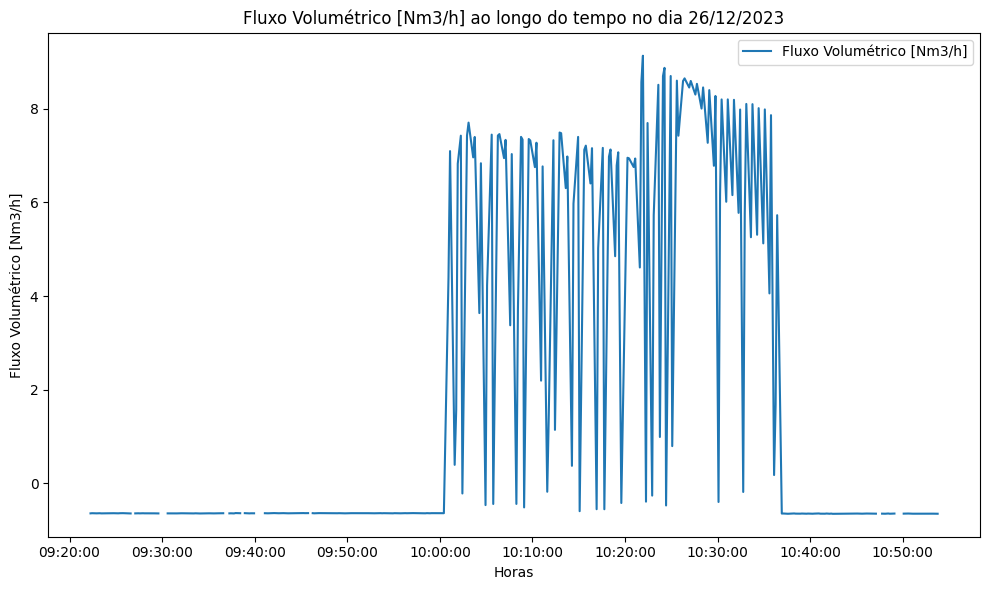

In [7]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_data['Data/Hora'], \
            db_data['M_Fluxo_[Nm3/h]'], \
                label='Fluxo Volumétrico [Nm3/h]')

# ADICIONANDO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Fluxo Volumétrico [Nm3/h]')

# ADICIONANDO O TÍTULO.
plt.title(f'Fluxo Volumétrico [Nm3/h] ao longo do tempo no dia {var_data_estudo}')

# # ADICIONANDO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# INCLINANDO O EIXO X.
# plt.xticks(rotation=45)

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **FILTRANDO A TABELA PARA UM HORÁRIO DE ESTUDO.**

---



In [8]:
# ESPECIFICANDO O HORÁRIO DE ESTUDO.
hora_inicio = input("Digite a hora inicial do PowerSet de produção no formato 'HH:MM:SS': ")

hora_fim = input("Digite a hora final do PowerSet de produção no formato 'HH:MM:SS': ")

# FILTRANDO OS DADOS DENTRO DO HORÁRIO ESPECIFICADO.
db_hr = db_data[(db_data['Data/Hora'].dt.time >= pd.to_datetime(hora_inicio).time()) &
                                        (db_data['Data/Hora'].dt.time <= pd.to_datetime(hora_fim).time())]

display(db_hr)

Digite a hora inicial do PowerSet de produção no formato 'HH:MM:SS': 10:00:18
Digite a hora final do PowerSet de produção no formato 'HH:MM:SS': 10:36:18


,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC]
2412,2023-12-26 10:00:25.767,2023-12-26,10:00:26,-0.638672,-0.048047,215.482819,29.396875
2413,2023-12-26 10:00:55.767,2023-12-26,10:00:56,4.395703,0.331641,215.598434,29.312500
2414,2023-12-26 10:01:05.767,2023-12-26,10:01:06,7.095313,0.533594,216.132812,29.143751
2415,2023-12-26 10:01:35.767,2023-12-26,10:01:36,0.394141,0.029297,217.571884,29.025000
2416,2023-12-26 10:01:45.767,2023-12-26,10:01:46,1.571094,0.117578,217.590622,29.134375
...,...,...,...,...,...,...,...
2523,2023-12-26 10:35:05.767,2023-12-26,10:35:06,7.985547,0.592188,219.342194,29.312500
2524,2023-12-26 10:35:35.767,2023-12-26,10:35:36,4.055860,0.302734,218.039062,29.359375
2525,2023-12-26 10:35:45.767,2023-12-26,10:35:46,7.862891,0.587500,217.821884,29.337500
2526,2023-12-26 10:36:05.767,2023-12-26,10:36:06,0.176172,0.013281,218.273438,29.353125


# **GERANDO UM GRÁFICO DE FLUXO X TEMPO FILTRADO PELO HORÁRIO IMPOSTO.**

---



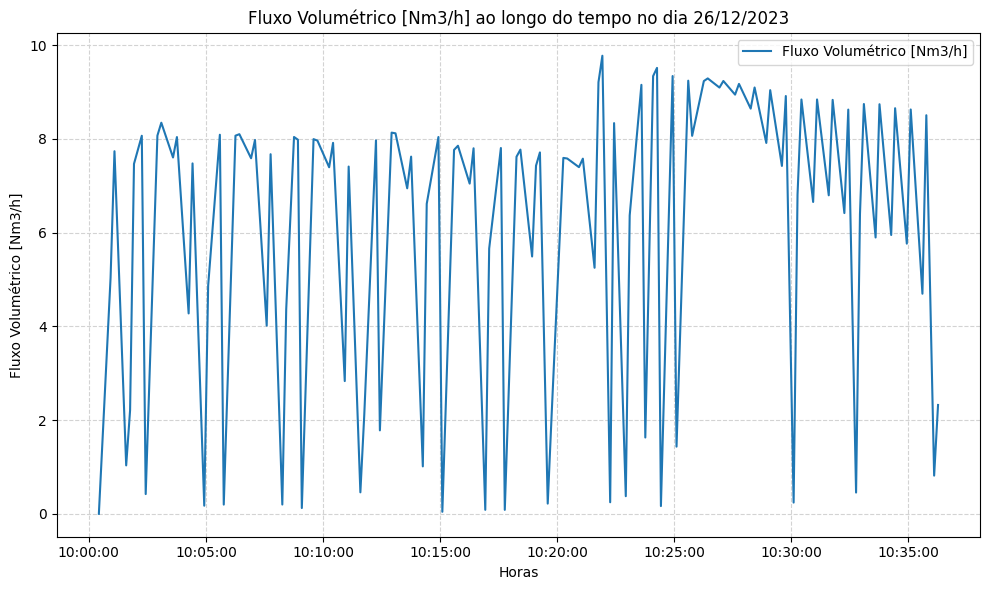

In [20]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_hr['Data/Hora'], \
            db_hr['M_Fluxo_[Nm3/h]'], \
                label='Fluxo Volumétrico [Nm3/h]')

# ADICIONANDO OS EIXOS.
plt.xlabel('Horas')
plt.ylabel('Fluxo Volumétrico [Nm3/h]')

# ADICIONANDO O TÍTULO.
plt.title(f'Fluxo Volumétrico [Nm3/h] ao longo do tempo no dia {var_data_estudo}')

# # ADICIONANDO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# CRIANDO LINHAS DE GRADE NO GRÁFICO.
plt.grid(True, linestyle='--', \
            color='lightgray')

# INCLINANDO O EIXO X.
# plt.xticks(rotation=45)

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **DELETANDO VALORES VAZIOS DA COLUNA M_Fluxo_[Nm3/h] E CRIANDO A COLUNA "Hora Decimal".**

---



In [10]:
# EXCLUINDO AS LINHAS ONDE A CÉLULA DA COLUNA 'M_Fluxo_[Nm3/h]' ESTÁ VAZIA.
db_hr = db_hr.dropna(subset=['M_Fluxo_[Nm3/h]'])

# CRIANDO A COLUNA DE HORAS EM FORMATO DECIMAL 'Hora_decimal'.
db_hr['Hora_decimal'] = db_hr['Data/Hora'].dt.hour + \
                                db_hr['Data/Hora'].dt.minute / 60 + \
                                    db_hr['Data/Hora'].dt.second / 3600

# ACRESCENTANDO O VALOR MÉDIO DOS NEGATIVOS AOS DADOS DE FLUXO DE MASSA.
media_negativos_oper = input("Digite a média dos valores negativos de fluxo: ")

media_negativos_oper = float(media_negativos_oper)

db_hr['M_Fluxo_[Nm3/h]'] += media_negativos_oper

display(db_hr)

Digite a média dos valores negativos de fluxo: 0.641


,Data/Hora,Data,Hora,M_Fluxo_[Nm3/h],V_Fluxo_[Nm3/h],P_Fluxo_[bar],T_Fluxo_[ºC],Hora_decimal
2412,2023-12-26 10:00:25.767,2023-12-26,10:00:26,0.002328,-0.048047,215.482819,29.396875,10.006944
2413,2023-12-26 10:00:55.767,2023-12-26,10:00:56,5.036703,0.331641,215.598434,29.312500,10.015278
2414,2023-12-26 10:01:05.767,2023-12-26,10:01:06,7.736313,0.533594,216.132812,29.143751,10.018056
2415,2023-12-26 10:01:35.767,2023-12-26,10:01:36,1.035141,0.029297,217.571884,29.025000,10.026389
2416,2023-12-26 10:01:45.767,2023-12-26,10:01:46,2.212094,0.117578,217.590622,29.134375,10.029167
...,...,...,...,...,...,...,...,...
2523,2023-12-26 10:35:05.767,2023-12-26,10:35:06,8.626547,0.592188,219.342194,29.312500,10.584722
2524,2023-12-26 10:35:35.767,2023-12-26,10:35:36,4.696860,0.302734,218.039062,29.359375,10.593056
2525,2023-12-26 10:35:45.767,2023-12-26,10:35:46,8.503891,0.587500,217.821884,29.337500,10.595833
2526,2023-12-26 10:36:05.767,2023-12-26,10:36:06,0.817172,0.013281,218.273438,29.353125,10.601389


# **TRAZENDO A REPRESENTAÇÃO DO VOLUME NO GRÁFICO DE FLUXO VOLUMÉTRICO POR TEMPO.**

---



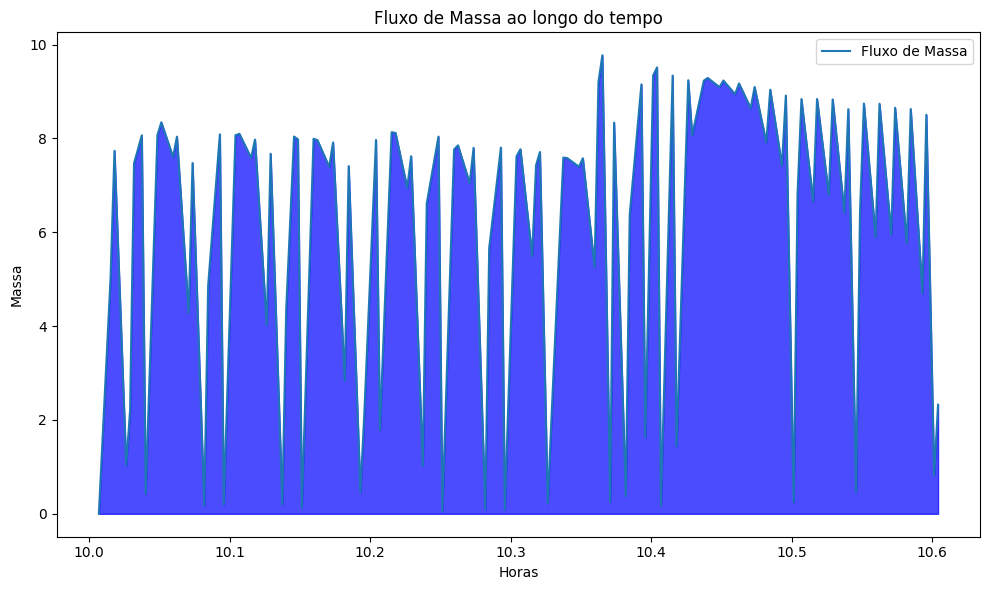

In [11]:
# CRIANDO A FIGURA E OS EIXOS.
fig, ax = plt.subplots(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
ax.plot(db_hr['Hora_decimal'], \
            db_hr['M_Fluxo_[Nm3/h]'], \
                label='Fluxo de Massa')

# PREENCHENDO A ÁREA SOB O GRÁFICO.
ax.fill_between(db_hr['Hora_decimal'], \
                    db_hr['M_Fluxo_[Nm3/h]'], \
                        color='blue', \
                            alpha=0.7)

# ADICIONADNO OS EIXOS.
ax.set_xlabel('Horas')

ax.set_ylabel('Massa')

# ADICIONADNO O TÍTULO.
plt.title('Fluxo de Massa ao longo do tempo')

# ADICIONADNO A LEGENDA.
ax.legend()

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **CALCULANDO A INTEGRAL DE Nm3/h EM RELAÇÃO A h, REFERENTE AO GRÁFICO.**

---



In [14]:
# CALCULANDO A INTEGRAL DOS DADOS DE FLUXO DE MASSA EM RELAÇÃO ÀS HORAS DECIMAIS PELO MÉTODO DO TRAPÉZIO.
integral_numerica = np.trapz(db_hr['M_Fluxo_[Nm3/h]'], \
                                x=db_hr['Hora_decimal'])

print("Quantidade de Fluxo de Massa em m³: ", integral_numerica)

# MULTIPLICANDO O VALOS DA INTEGRAL POR 0,0899 PARA TRAZER A QUANTIDADE DE H2 EM KG.
qdd_H2 = integral_numerica * 0.0899

print("Quantidade de H2 produzido em kg: ", qdd_H2)

# COMPARANDO A RPODUÇÃO DE H2 CALCULADO E ENCONTRADO.
comparacao =  0.26 / qdd_H2

print("Relação de antes e depois H2/H2: ", comparacao)

# TRAZENDO O PERCENTUAL DE APROXIMAÇÃO ENTRE A RPODUÇÃO DE H2 CALCULADO E ENCONTRADO.
comparacao = comparacao * 100

# FORMATANDO O DADO DE COMPARAÇÃO
comparacao_format = "{:.3f}%".format(comparacao)

print("Relação Percentual de antes e depois H2/H2: ", comparacao_format)

Quantidade de Fluxo de Massa em m³:  3.6647596086338248
Quantidade de H2 produzido em kg:  0.3294618888161808
Relação de antes e depois H2/H2:  0.7891656328877049
Relação Percentual de antes e depois H2/H2:  78.917%


# **COMPARAÇÃO ENTRE PRESSÃO E FLUXO DE MASSA VINDO DO SENSOR DE FLUXO.**

---



<ipython-input-29-e1553a4e2681>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(db_hr['Data/Hora'][::10].dt.strftime('%d/%m/%Y \n %H:%M'))


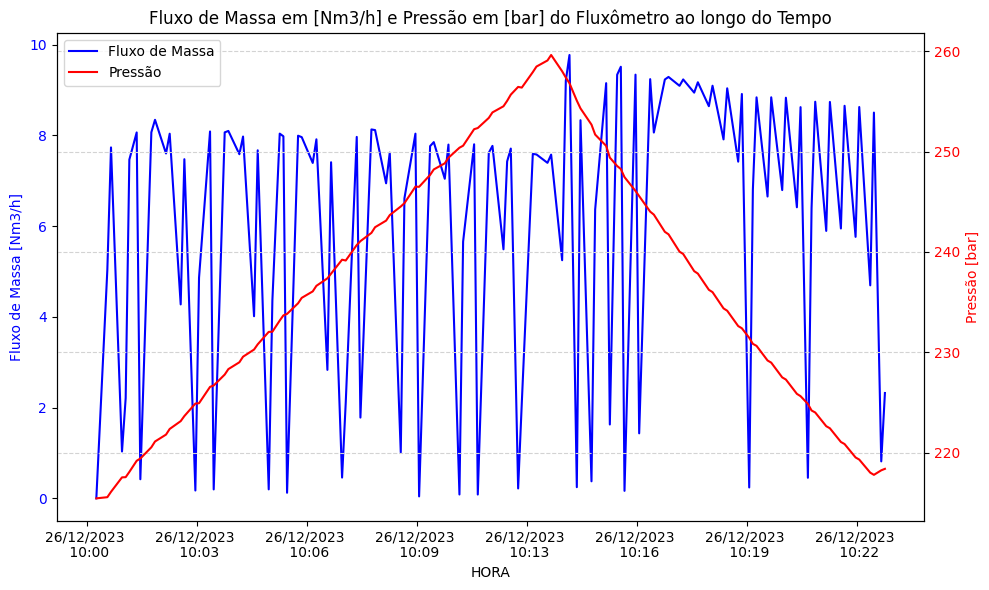

In [29]:
# CRIANDO A FIGURA.
fig, ax1 = plt.subplots(figsize=(10, 6))

# PLOTANDO OS DADOS PARA O PRIMEIRO EIXO Y (À ESQUERDA).
ax1.plot(db_hr['Data/Hora'], \
            db_hr['M_Fluxo_[Nm3/h]'], \
                label='Fluxo de Massa', \
                    color='blue')

ax1.set_xlabel('HORA')

ax1.set_ylabel('Fluxo de Massa [Nm3/h]', \
                    color='blue')

ax1.tick_params(axis='y', labelcolor='blue')

# # PLOTANDO OS DADOS PARA O SEGUNDO EIXO Y (À DIREITA).
ax2 = ax1.twinx()

ax2.plot(db_hr['Data/Hora'], \
            db_hr['P_Fluxo_[bar]'], \
                label='Pressão', \
                    color='red')

ax2.set_ylabel('Pressão [bar]', \
                    color='red')

ax2.tick_params(axis='y', \
                    labelcolor='red')

# ADICIONADNO A LEGENDA.
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, \
                labels + labels2, \
                    loc='upper left')

# CRIANDO LINHAS DE GRADE NO GRÁFICO.
plt.grid(True, linestyle='--', \
            color='lightgray')

# ADICIONADNO O TÍTULO.
plt.title('Fluxo de Massa em [Nm3/h] e Pressão em [bar] do Fluxômetro ao longo do Tempo')

# FORMATANDO O EIXO X.
ax1.set_xticklabels(db_hr['Data/Hora'][::10].dt.strftime('%d/%m/%Y \n %H:%M'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **CRIANDO O GRÁFICO COMPARATIVO ENTRE A PRESSÃO DO BUFFER E O FLUXO DE MASSA.**

---



<ipython-input-38-8dc029533a99>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(db_hr['Data/Hora'][::10].dt.strftime('%d/%m/%Y \n %H:%M'))


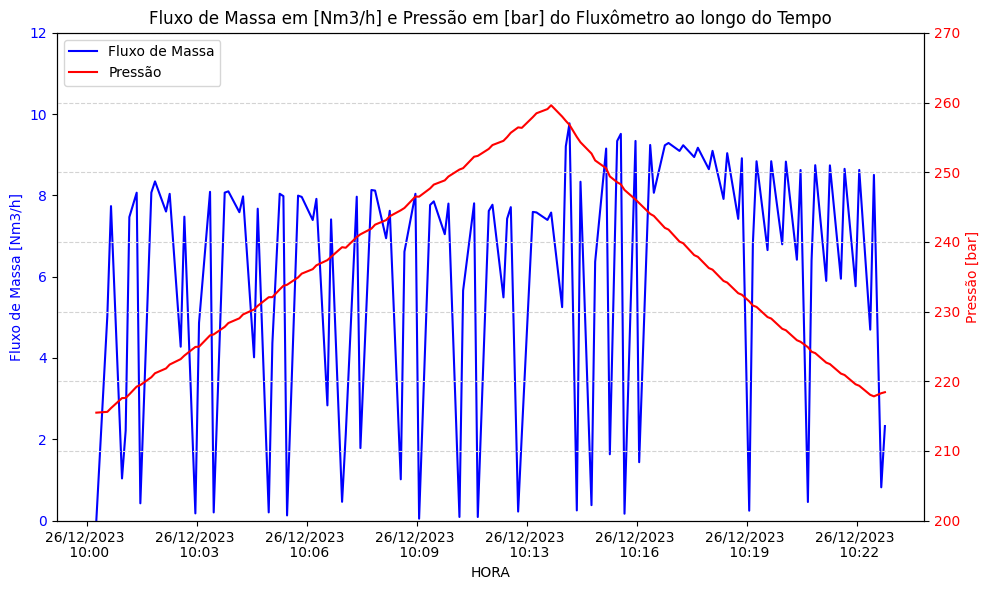

In [38]:
# CRIANDO A FIGURA.
fig, ax1 = plt.subplots(figsize=(10, 6))

# PLOTANDO OS DADOS PARA O PRIMEIRO EIXO Y (À ESQUERDA).
ax1.plot(db_hr['Data/Hora'], \
            db_hr['M_Fluxo_[Nm3/h]'], \
                label='Fluxo de Massa', \
                    color='blue')

ax1.set_xlabel('HORA')

ax1.set_ylabel('Fluxo de Massa [Nm3/h]', \
                    color='blue')

ax1.tick_params(axis='y', labelcolor='blue')

# # PLOTANDO OS DADOS PARA O SEGUNDO EIXO Y (À DIREITA).
ax2 = ax1.twinx()

ax2.plot(db_hr['Data/Hora'], \
            db_hr['P_Fluxo_[bar]'], \
                label='Pressão', \
                    color='red')

ax2.set_ylabel('Pressão [bar]', \
                    color='red')

ax2.tick_params(axis='y', \
                    labelcolor='red')

# ADICIONADNO A LEGENDA.
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, \
                labels + labels2, \
                    loc='upper left')

# CRIANDO LINHAS DE GRADE NO GRÁFICO.
plt.grid(True, linestyle='--', \
            color='lightgray')

# ADICIONADNO O TÍTULO.
plt.title('Fluxo de Massa em [Nm3/h] e Pressão em [bar] do Fluxômetro ao longo do Tempo')

# FORMATANDO O EIXO X.
ax1.set_xticklabels(db_hr['Data/Hora'][::10].dt.strftime('%d/%m/%Y \n %H:%M'))

# DEFININDO OS LIMITES DOS EIXOS X E Y.
# ax1.set_xlim(inicio, fim)
ax1.set_ylim(0, 12) #    DEFINE O EIXO Y ESQUERDO.
ax2.set_ylim(200, 270) #    DEFINE O EIXO Y DIREITO.

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()